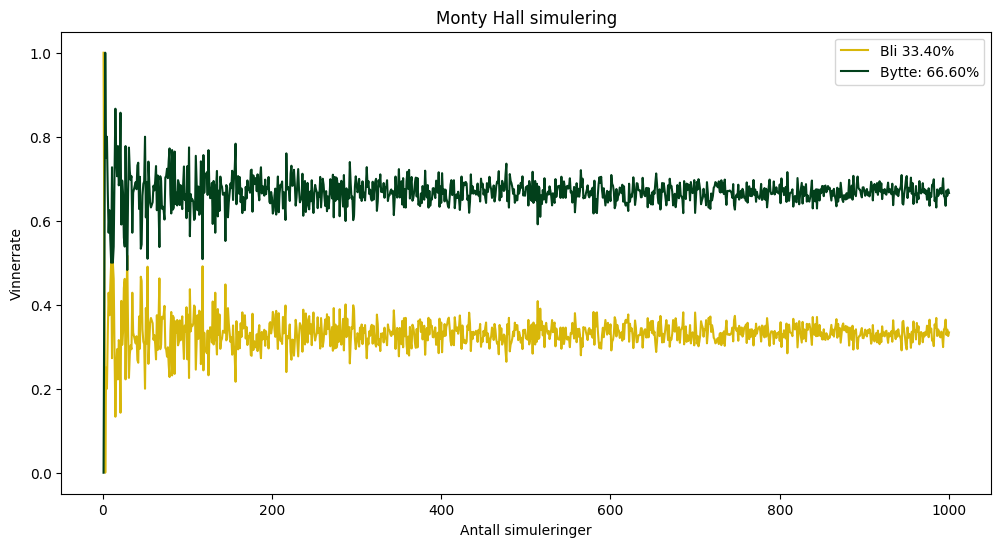

In [62]:
# Skrevet med hjelp av ChatGPT

import random
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

def monty_hall_simulation(num_simulations):
    stay_wins = 0
    switch_wins = 0
    for _ in range(num_simulations):
        # Set up doors
        doors = [0, 0, 1]  # 0 represents goat, 1 represents car
        random.shuffle(doors)

        # Contestant makes initial choice
        contestant_choice = random.randint(0, 2)

        # Host reveals a goat
        remaining_doors = [i for i in range(3) if i != contestant_choice and doors[i] == 0]
        door_revealed = random.choice(remaining_doors)

        # Contestant chooses to stay
        if doors[contestant_choice] == 1:
            stay_wins += 1

        # Contestant chooses to switch
        switched_choice = [i for i in range(3) if i != contestant_choice and i != door_revealed][0]
        if doors[switched_choice] == 1:
            switch_wins += 1

    return stay_wins, switch_wins

def simulate_and_plot(max_simulations):
    stay_win_rates = []
    switch_win_rates = []
    simulation_counts = list(range(1, max_simulations + 1))
    
    for num_simulations in simulation_counts:
        stay_wins, switch_wins = monty_hall_simulation(num_simulations)
        stay_win_rate = stay_wins / num_simulations
        switch_win_rate = switch_wins / num_simulations
        stay_win_rates.append(stay_win_rate)
        switch_win_rates.append(switch_win_rate)


        final_stay_win_rate = stay_win_rates[-1] * 100
        final_switch_win_rate = switch_win_rates[-1] * 100
        # Update plot every 10 simulations
        if num_simulations % 10 == 0 or num_simulations == max_simulations:
            plt.figure(figsize=(12, 6))
            plt.clf()  # Clear the previous plot
            plt.plot(simulation_counts[:num_simulations], stay_win_rates, label=f'Bli {final_stay_win_rate:.2f}%', color='#D8B70A')
            plt.plot(simulation_counts[:num_simulations], switch_win_rates, label=f'Bytte: {final_switch_win_rate:.2f}%', color='#02401B')
            plt.xlabel('Antall simuleringer')
            plt.ylabel('Vinnerrate')
            plt.title('Monty Hall simulering')
            plt.legend()
            plt.pause(0.8 if num_simulations <= 50 else 0.1)
            clear_output(wait=True)
    plt.show()

if __name__ == "__main__":
    max_simulations = 1000  # You can adjust the maximum number of simulations here
    simulate_and_plot(max_simulations)
